Task-1

import

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Load data  and explore basic info


In [49]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
print("Initial Data Overview:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin   

Handle missing values using mean/median/imputation.

In [50]:
# Safely fill missing values without using inplace on a copy
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column (no change needed here)
df = df.drop(columns=['Cabin'])  # This also avoids chained assignment

# Display any remaining missing values
print("\nMissing Values After Imputation:\n", df.isnull().sum())



Missing Values After Imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Convert categorical features into numerical using encoding.

In [51]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['Sex', 'Embarked'], drop_first=True)

df_encoded = df_encoded.astype({col: int for col in df_encoded.columns if df_encoded[col].dtype == 'bool'})

df_encoded.drop(columns=['Name', 'Ticket'], inplace=True)

print(df.dtypes)

print(df_encoded.head())


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500         1   
1            2         1       1  38.0      1      0  71.2833         0   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         0   
4            5         0       3  35.0      0      0   8.0500         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


Normalize/standardize the numerical features.

In [52]:
scaler = StandardScaler()
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
print(df.dtypes)
print(df_encoded.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
   PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0            1         0       3 -0.565736  0.432793 -0.473674 -0.502445   
1            2         1       1  0.663861  0.432793 -0.473674  0.786845   
2            3         1       3 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1       1  0.433312  0.432793 -0.473674  0.420730   
4            5         0       3  0.433312 -0.474545 -0.473674 -0.486337   

   Sex_male  Embarked_Q  Embarked_S  
0         1           0           1  
1         0           0           0  
2         0           0           1  
3         0           0           1  
4         1           0           1  


Visualize outliers using boxplots and remove them.

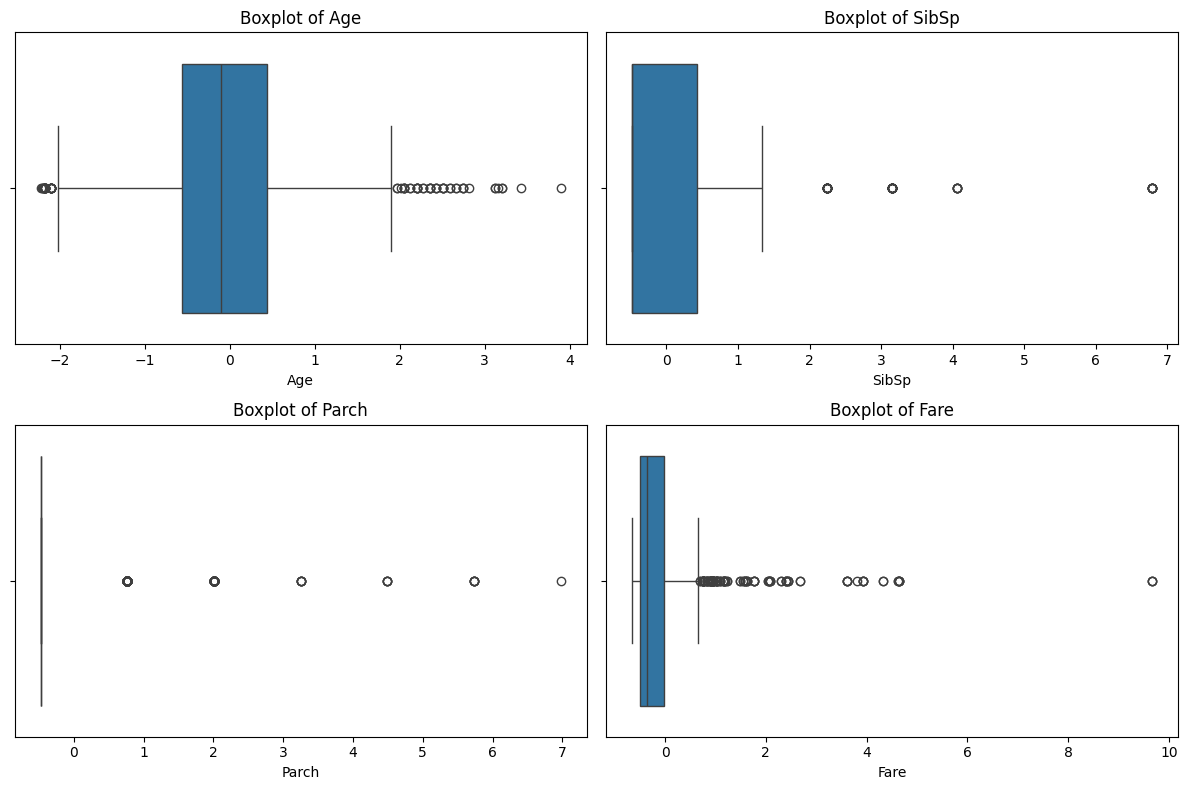

In [45]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Data shape after outlier removal: (561, 10)


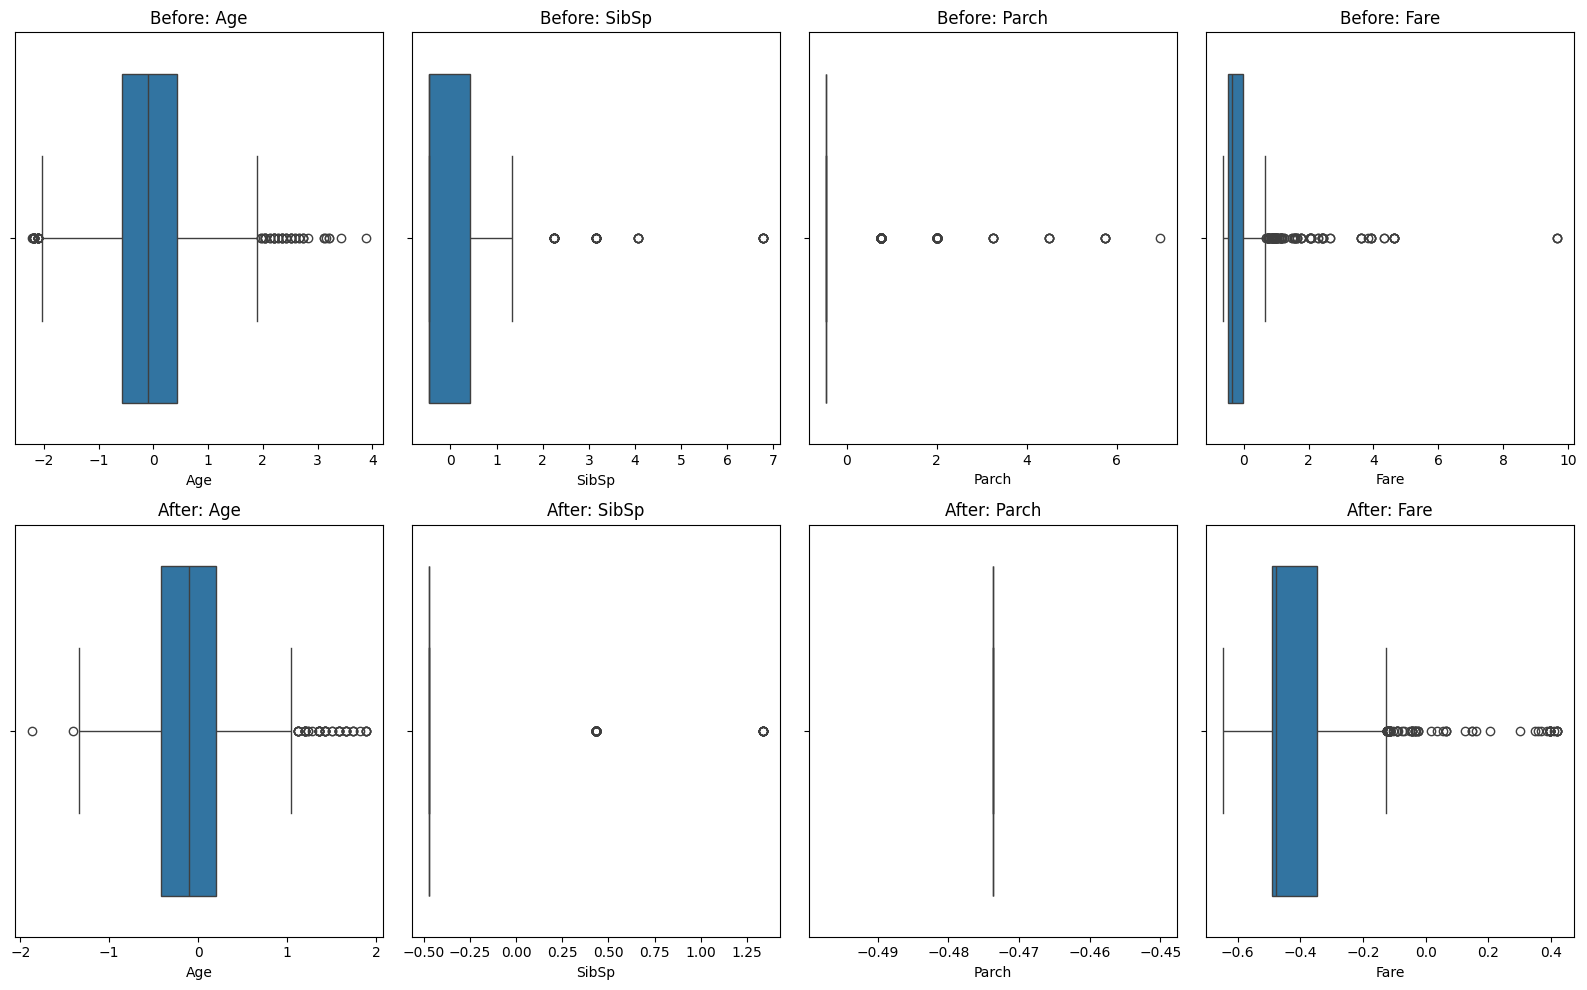

In [53]:
# Backup the original for comparison
df_before_outlier_removal = df_encoded.copy()

# Outlier removal using IQR
for col in num_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_encoded = df_encoded[(df_encoded[col] >= lower) & (df_encoded[col] <= upper)]

print("\nData shape after outlier removal:", df_encoded.shape)

# Plotting: Before and After Boxplots
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols):
    # Before
    plt.subplot(2, len(num_cols), i + 1)
    sns.boxplot(x=df_before_outlier_removal[col])
    plt.title(f'Before: {col}')

    # After
    plt.subplot(2, len(num_cols), i + 1 + len(num_cols))
    sns.boxplot(x=df_encoded[col])
    plt.title(f'After: {col}')

plt.tight_layout()
plt.show()